In [155]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error

In [156]:
# Fetch the Data from csv file

house_data = pd.read_csv("train.csv")
house_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [157]:
# Check the shape od Dataframe
house_data.shape

(1460, 81)

In [158]:
# Dataframe contains 1460 rows and 81 columns

# check the info of dataframe to check column with Null values

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [159]:
# After analysing we can drop Alley,PoolQC, Fence and MiscFeature columns

house_data = house_data.drop(columns=['Alley','PoolQC','Fence', 'MiscFeature'])

In [160]:
#check the info of dataframe
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [161]:
# Set max column and row size to max

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [162]:
# Checking for percentage nulls
round(100*(house_data.isnull().sum()/len(house_data.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF   

In [163]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [164]:
#describe the dataset to check the dataframe

house_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [165]:
#Check the values present for LotFrontage

house_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3
124.0      2

In [166]:
# Fill the na values with the median of LotFrontage

house_data.LotFrontage = house_data.LotFrontage.fillna(house_data.LotFrontage.median())

In [167]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [168]:
house_data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [169]:
#replace Na values of MasVnrType with None

house_data.MasVnrType = house_data.MasVnrType.fillna('None')

In [170]:
house_data.MasVnrArea.value_counts()

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

In [171]:
#impute missing values of MasVnrArea with median

house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

In [172]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [173]:
house_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [174]:
#impute missing values of FireplaceQu with NA i.e. No Fireplace as mentioned in Description File

house_data.FireplaceQu = house_data.FireplaceQu.fillna('NA')  

In [175]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [176]:
#impute missing values  with NA for columns BsmtQual, BsmtCond, BsmtExposure, BsmtExposure, BsmtFinType2, GarageType,GarageQual
# GarageCond and GarageFinish

house_data.BsmtQual = house_data.BsmtQual.fillna('NA')
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')
house_data.BsmtExposure = house_data.BsmtExposure.fillna('NA')
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')
house_data.GarageType = house_data.GarageType.fillna('NA')
house_data.GarageQual = house_data.GarageQual.fillna('NA')
house_data.GarageCond = house_data.GarageCond.fillna('NA')
house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [177]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

Electrical      1
GarageYrBlt    81
dtype: int64

In [178]:
house_data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [179]:
house_data.Electrical.mode()[0]

'SBrkr'

In [180]:
# Fill the Electrical missing column with mode value

house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])

In [181]:
house_data.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

In [182]:
# Fill the GarageYrBlt missing column values with 0 i.e. No Garage

house_data.GarageYrBlt = house_data.GarageYrBlt.fillna(0)

In [183]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

Series([], dtype: int64)

In [184]:
#check number of unique entries in each column
house_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            5
BsmtCond            5
BsmtExposure        5
BsmtFinType1        7
BsmtFinSF1        637
BsmtFinType2        7
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [185]:
# Drop ID column

house_data = house_data.drop(columns=['Id'])

In [186]:
# Check the shape of dataframe
house_data.shape

(1460, 76)

In [187]:
# Drop the duplicate columns if present in the dataframe
house_data = house_data.drop_duplicates()

In [188]:
# Check the shape of dataframe
house_data.shape

(1460, 76)

In [189]:
for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlope, dtype: float64
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWAmes     0.050000
SawyerW    0.040411
BrkSide    0.039726
Crawfor    0.034932
Mitchel    0.

In [190]:
#Drop columns which have more bias data
house_data=house_data.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [191]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  RoofStyle      1460 non-null   object 
 13  Exterior1st    1460 non-null   object 
 14  Exterior2nd    1460 non-null   object 
 15  MasVnrType     1460 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  Foundati

In [192]:
# Calculate the age of House
house_data['Age'] = house_data.YrSold - house_data.YearBuilt

In [193]:
house_data=house_data.drop(columns=['YrSold','YrSold'])

In [194]:
house_data.shape

(1460, 56)

In [195]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  RoofStyle      1460 non-null   object 
 13  Exterior1st    1460 non-null   object 
 14  Exterior2nd    1460 non-null   object 
 15  MasVnrType     1460 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  Foundati

In [196]:
#Get all object type columns
numeric_columns = []
for c in house_data.columns:
    if house_data[c].dtype == np.int64 or house_data[c].dtype == np.float64:
         numeric_columns.append(c)
    #if house_data[c].dtype == np.int64:
     #   numeric_columns.append(c)
print(numeric_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice', 'Age']


In [197]:
#check the categorial variables

for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)

MSZoning
LotShape
LotConfig
Neighborhood
HouseStyle
RoofStyle
Exterior1st
Exterior2nd
MasVnrType
ExterQual
Foundation
BsmtQual
BsmtExposure
BsmtFinType1
HeatingQC
KitchenQual
FireplaceQu
GarageType
GarageFinish


In [198]:
# Create Dummy Variables for the categorial varibales MSZoning

MSZoning_df = pd.get_dummies(house_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0            0            0            1            0
1            0            0            1            0
2            0            0            1            0
3            0            0            1            0
4            0            0            1            0

In [199]:
# Create Dummy Variables for the categorial varibales for LotShape

LotShape_df = pd.get_dummies(house_data['LotShape'],drop_first=True, prefix='LotShape')
LotShape_df.head()

LotShape_IR2  LotShape_IR3  LotShape_Reg
0             0             0             1
1             0             0             1
2             0             0             0
3             0             0             0
4             0             0             0

In [200]:
# Create Dummy Variables for the categorial varibales for LotConfig

LotConfig_df = pd.get_dummies(house_data['LotConfig'],drop_first=True, prefix='LotConfig')
LotConfig_df.head()

LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside
0                  0              0              0                 1
1                  0              1              0                 0
2                  0              0              0                 1
3                  0              0              0                 0
4                  0              1              0                 0

In [201]:
# Create Dummy Variables for the categorial varibales for Neighborhood

Neighborhood_df = pd.get_dummies(house_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
Neighborhood_df.head()

Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   
3                     0                     0                     1   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   
3                     0                     0                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     1   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  
0                     0                    0                     0  
1                     0                    0                     1  
2                     0                    0                     0  
3                     0                    0                     0  
4                     0                    0                     0

In [202]:
# Create Dummy Variables for the categorial varibales for HouseStyle

HouseStyle_df = pd.get_dummies(house_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
HouseStyle_df.head()

HouseStyle_1.5Unf  HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  \
0                  0                  0                  0                  0   
1                  0                  1                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  
0                  1                  0                0  
1                  0                  0                0  
2                  1                  0                0  
3                  1                  0                0  
4                  1                  0                0

In [203]:
# Create Dummy Variables for the categorial varibales for RoofStyle

RoofStyle_df = pd.get_dummies(house_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
RoofStyle_df.head()

RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  \
0                1                  0              0                  0   
1                1                  0              0                  0   
2                1                  0              0                  0   
3                1                  0              0                  0   
4                1                  0              0                  0   

   RoofStyle_Shed  
0               0  
1               0  
2               0  
3               0  
4               0

In [204]:
# Create Dummy Variables for the categorial varibales for Exterior1st

Exterior1st_df = pd.get_dummies(house_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
Exterior1st_df.head()

Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Exterior1st_CBlock  Exterior1st_CemntBd  Exterior1st_HdBoard  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   Exterior1st_ImStucc  Exterior1st_MetalSd  Exterior1st_Plywood  \
0                    0                    0                    0   
1                    0                    1                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Exterior1st_Stone  Exterior1st_Stucco  Exterior1st_VinylSd  \
0                  0                   0                    1   
1                  0                   0                    0   
2                  0                   0                    1   
3                  0                   0                    0   
4                  0                   0                    1   

   Exterior1st_Wd Sdng  Exterior1st_WdShing  
0                    0                    0  
1                    0                    0  
2                    0                    0  
3                    1                    0  
4                    0                    0

In [205]:
# Create Dummy Variables for the categorial varibales for Exterior2nd

Exterior2nd_df = pd.get_dummies(house_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
Exterior2nd_df.head()

Exterior2nd_AsphShn  Exterior2nd_Brk Cmn  Exterior2nd_BrkFace  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   Exterior2nd_CBlock  Exterior2nd_CmentBd  Exterior2nd_HdBoard  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   Exterior2nd_ImStucc  Exterior2nd_MetalSd  Exterior2nd_Other  \
0                    0                    0                  0   
1                    0                    1                  0   
2                    0                    0                  0   
3                    0                    0                  0   
4                    0                    0                  0   

   Exterior2nd_Plywood  Exterior2nd_Stone  Exterior2nd_Stucco  \
0                    0                  0                   0   
1                    0                  0                   0   
2                    0                  0                   0   
3                    0                  0                   0   
4                    0                  0                   0   

   Exterior2nd_VinylSd  Exterior2nd_Wd Sdng  Exterior2nd_Wd Shng  
0                    1                    0                    0  
1                    0                    0                    0  
2                    1                    0                    0  
3                    0                    0                    1  
4                    1                    0                    0

In [206]:
# Create Dummy Variables for the categorial varibales for MasVnrType

MasVnrType_df = pd.get_dummies(house_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
MasVnrType_df.head()

MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone
0                   1                0                 0
1                   0                1                 0
2                   1                0                 0
3                   0                1                 0
4                   1                0                 0

In [207]:
# Create Dummy Variables for the categorial varibales for ExterQual

ExterQual_df = pd.get_dummies(house_data['ExterQual'],drop_first=True, prefix='ExterQual')
ExterQual_df.head()

ExterQual_Fa  ExterQual_Gd  ExterQual_TA
0             0             1             0
1             0             0             1
2             0             1             0
3             0             0             1
4             0             1             0

In [208]:
# Create Dummy Variables for the categorial varibales for BsmtExposure

BsmtExposure_df = pd.get_dummies(house_data['BsmtExposure'],drop_first=True, prefix='BsmtExposure')
BsmtExposure_df.head()

BsmtExposure_Gd  BsmtExposure_Mn  BsmtExposure_NA  BsmtExposure_No
0                0                0                0                1
1                1                0                0                0
2                0                1                0                0
3                0                0                0                1
4                0                0                0                0

In [209]:
# Create Dummy Variables for the categorial varibales for Foundation

Foundation_df = pd.get_dummies(house_data['Foundation'],drop_first=True, prefix='Foundation')
Foundation_df.head()

Foundation_CBlock  Foundation_PConc  Foundation_Slab  Foundation_Stone  \
0                  0                 1                0                 0   
1                  1                 0                0                 0   
2                  0                 1                0                 0   
3                  0                 0                0                 0   
4                  0                 1                0                 0   

   Foundation_Wood  
0                0  
1                0  
2                0  
3                0  
4                0

In [210]:
# Create Dummy Variables for the categorial varibales for BsmtQual

BsmtQual_df = pd.get_dummies(house_data['BsmtQual'],drop_first=True, prefix='BsmtQual')
BsmtQual_df.head()

BsmtQual_Fa  BsmtQual_Gd  BsmtQual_NA  BsmtQual_TA
0            0            1            0            0
1            0            1            0            0
2            0            1            0            0
3            0            0            0            1
4            0            1            0            0

In [211]:
# Create Dummy Variables for the categorial varibales for BsmtFinType1

BsmtFinType1_df = pd.get_dummies(house_data['BsmtFinType1'],drop_first=True, prefix='BsmtFinType1')
BsmtFinType1_df.head()

BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  BsmtFinType1_NA  \
0                 0                 1                 0                0   
1                 0                 0                 0                0   
2                 0                 1                 0                0   
3                 0                 0                 0                0   
4                 0                 1                 0                0   

   BsmtFinType1_Rec  BsmtFinType1_Unf  
0                 0                 0  
1                 0                 0  
2                 0                 0  
3                 0                 0  
4                 0                 0

In [212]:
# Create Dummy Variables for the categorial varibales for HeatingQC

HeatingQC_df = pd.get_dummies(house_data['HeatingQC'],drop_first=True, prefix='HeatingQC')
HeatingQC_df.head()

HeatingQC_Fa  HeatingQC_Gd  HeatingQC_Po  HeatingQC_TA
0             0             0             0             0
1             0             0             0             0
2             0             0             0             0
3             0             1             0             0
4             0             0             0             0

In [213]:
# Create Dummy Variables for the categorial varibales for KitchenQual

KitchenQual_df = pd.get_dummies(house_data['KitchenQual'],drop_first=True, prefix='KitchenQual')
KitchenQual_df.head()

KitchenQual_Fa  KitchenQual_Gd  KitchenQual_TA
0               0               1               0
1               0               0               1
2               0               1               0
3               0               1               0
4               0               1               0

In [214]:
# Create Dummy Variables for the categorial varibales for FireplaceQu

FireplaceQu_df = pd.get_dummies(house_data['FireplaceQu'],drop_first=True, prefix='FireplaceQu')
FireplaceQu_df.head()

FireplaceQu_Fa  FireplaceQu_Gd  FireplaceQu_NA  FireplaceQu_Po  \
0               0               0               1               0   
1               0               0               0               0   
2               0               0               0               0   
3               0               1               0               0   
4               0               0               0               0   

   FireplaceQu_TA  
0               0  
1               1  
2               1  
3               0  
4               1

In [215]:
# Create Dummy Variables for the categorial varibales for GarageType

GarageType_df = pd.get_dummies(house_data['GarageType'],drop_first=True, prefix='GarageType')
GarageType_df.head()

GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  0                   0                   0   
4                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_NA  
0                   0                  0              0  
1                   0                  0              0  
2                   0                  0              0  
3                   0                  1              0  
4                   0                  0              0

In [216]:
# Create Dummy Variables for the categorial varibales for GarageFinish

GarageFinish_df = pd.get_dummies(house_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
GarageFinish_df.head()

GarageFinish_NA  GarageFinish_RFn  GarageFinish_Unf
0                0                 1                 0
1                0                 1                 0
2                0                 1                 0
3                0                 0                 1
4                0                 1                 0

In [217]:
# Concat all the dummy dataframes with house_data

house_data = pd.concat([house_data,MSZoning_df,LotShape_df,LotConfig_df,Neighborhood_df,HouseStyle_df,RoofStyle_df,Exterior1st_df,Exterior2nd_df,MasVnrType_df,ExterQual_df,BsmtExposure_df,Foundation_df,BsmtQual_df,BsmtFinType1_df,HeatingQC_df,KitchenQual_df,FireplaceQu_df,GarageType_df],axis=1)

In [218]:
house_data.shape

(1460, 175)

In [219]:
#Drop categorical variables as we have already created the dummy variable
house_data=house_data.drop(columns=['MSZoning','LotShape','LotConfig','Neighborhood','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','BsmtExposure','Foundation','BsmtQual','BsmtFinType1','HeatingQC','KitchenQual','FireplaceQu','GarageType'])

In [220]:
house_data.shape

(1460, 157)

In [221]:
for c in house_data.columns:
    if house_data[c].dtype == np.object :
        print(c)

GarageFinish


In [222]:
# Concat all the dummy dataframes with house_data

house_data = pd.concat([house_data,GarageFinish_df],axis=1)

In [223]:
house_data.shape

(1460, 160)

In [224]:
house_data=house_data.drop(columns=['GarageFinish'])

In [225]:
house_data.shape

(1460, 159)

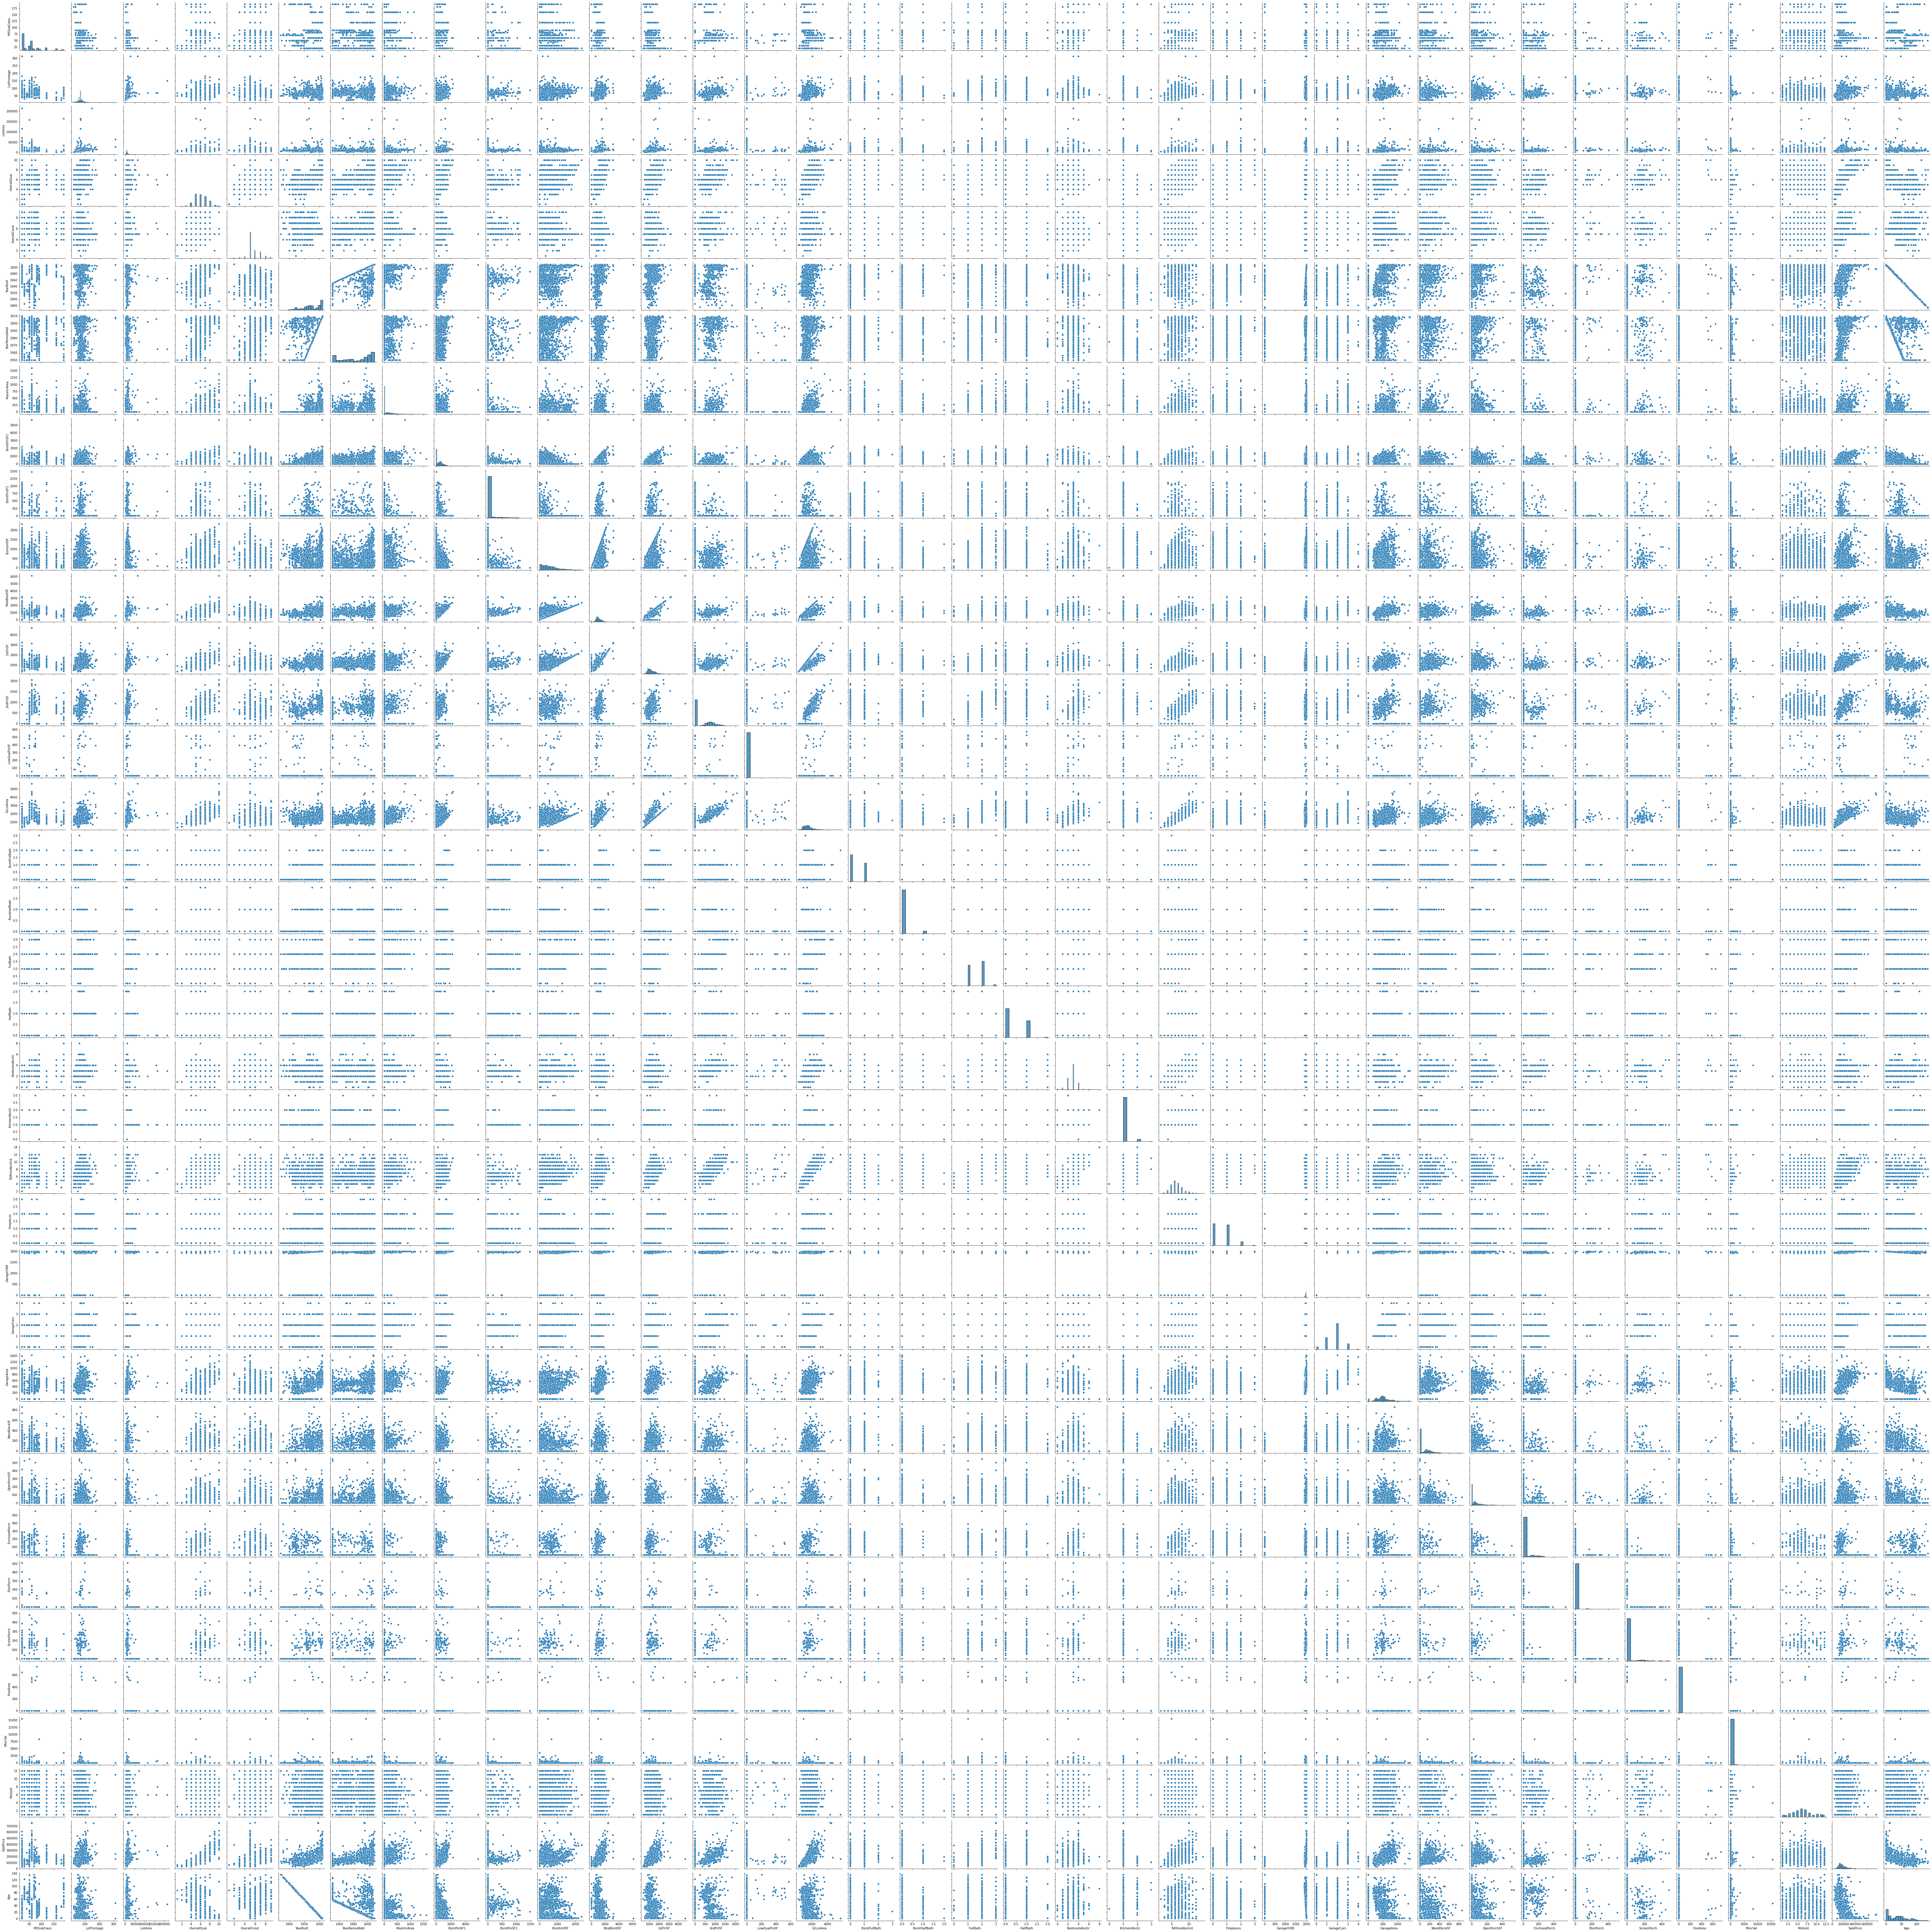

In [226]:
# scatter plot for all numeric columns
sns.pairplot(house_data[numeric_columns])
plt.show()

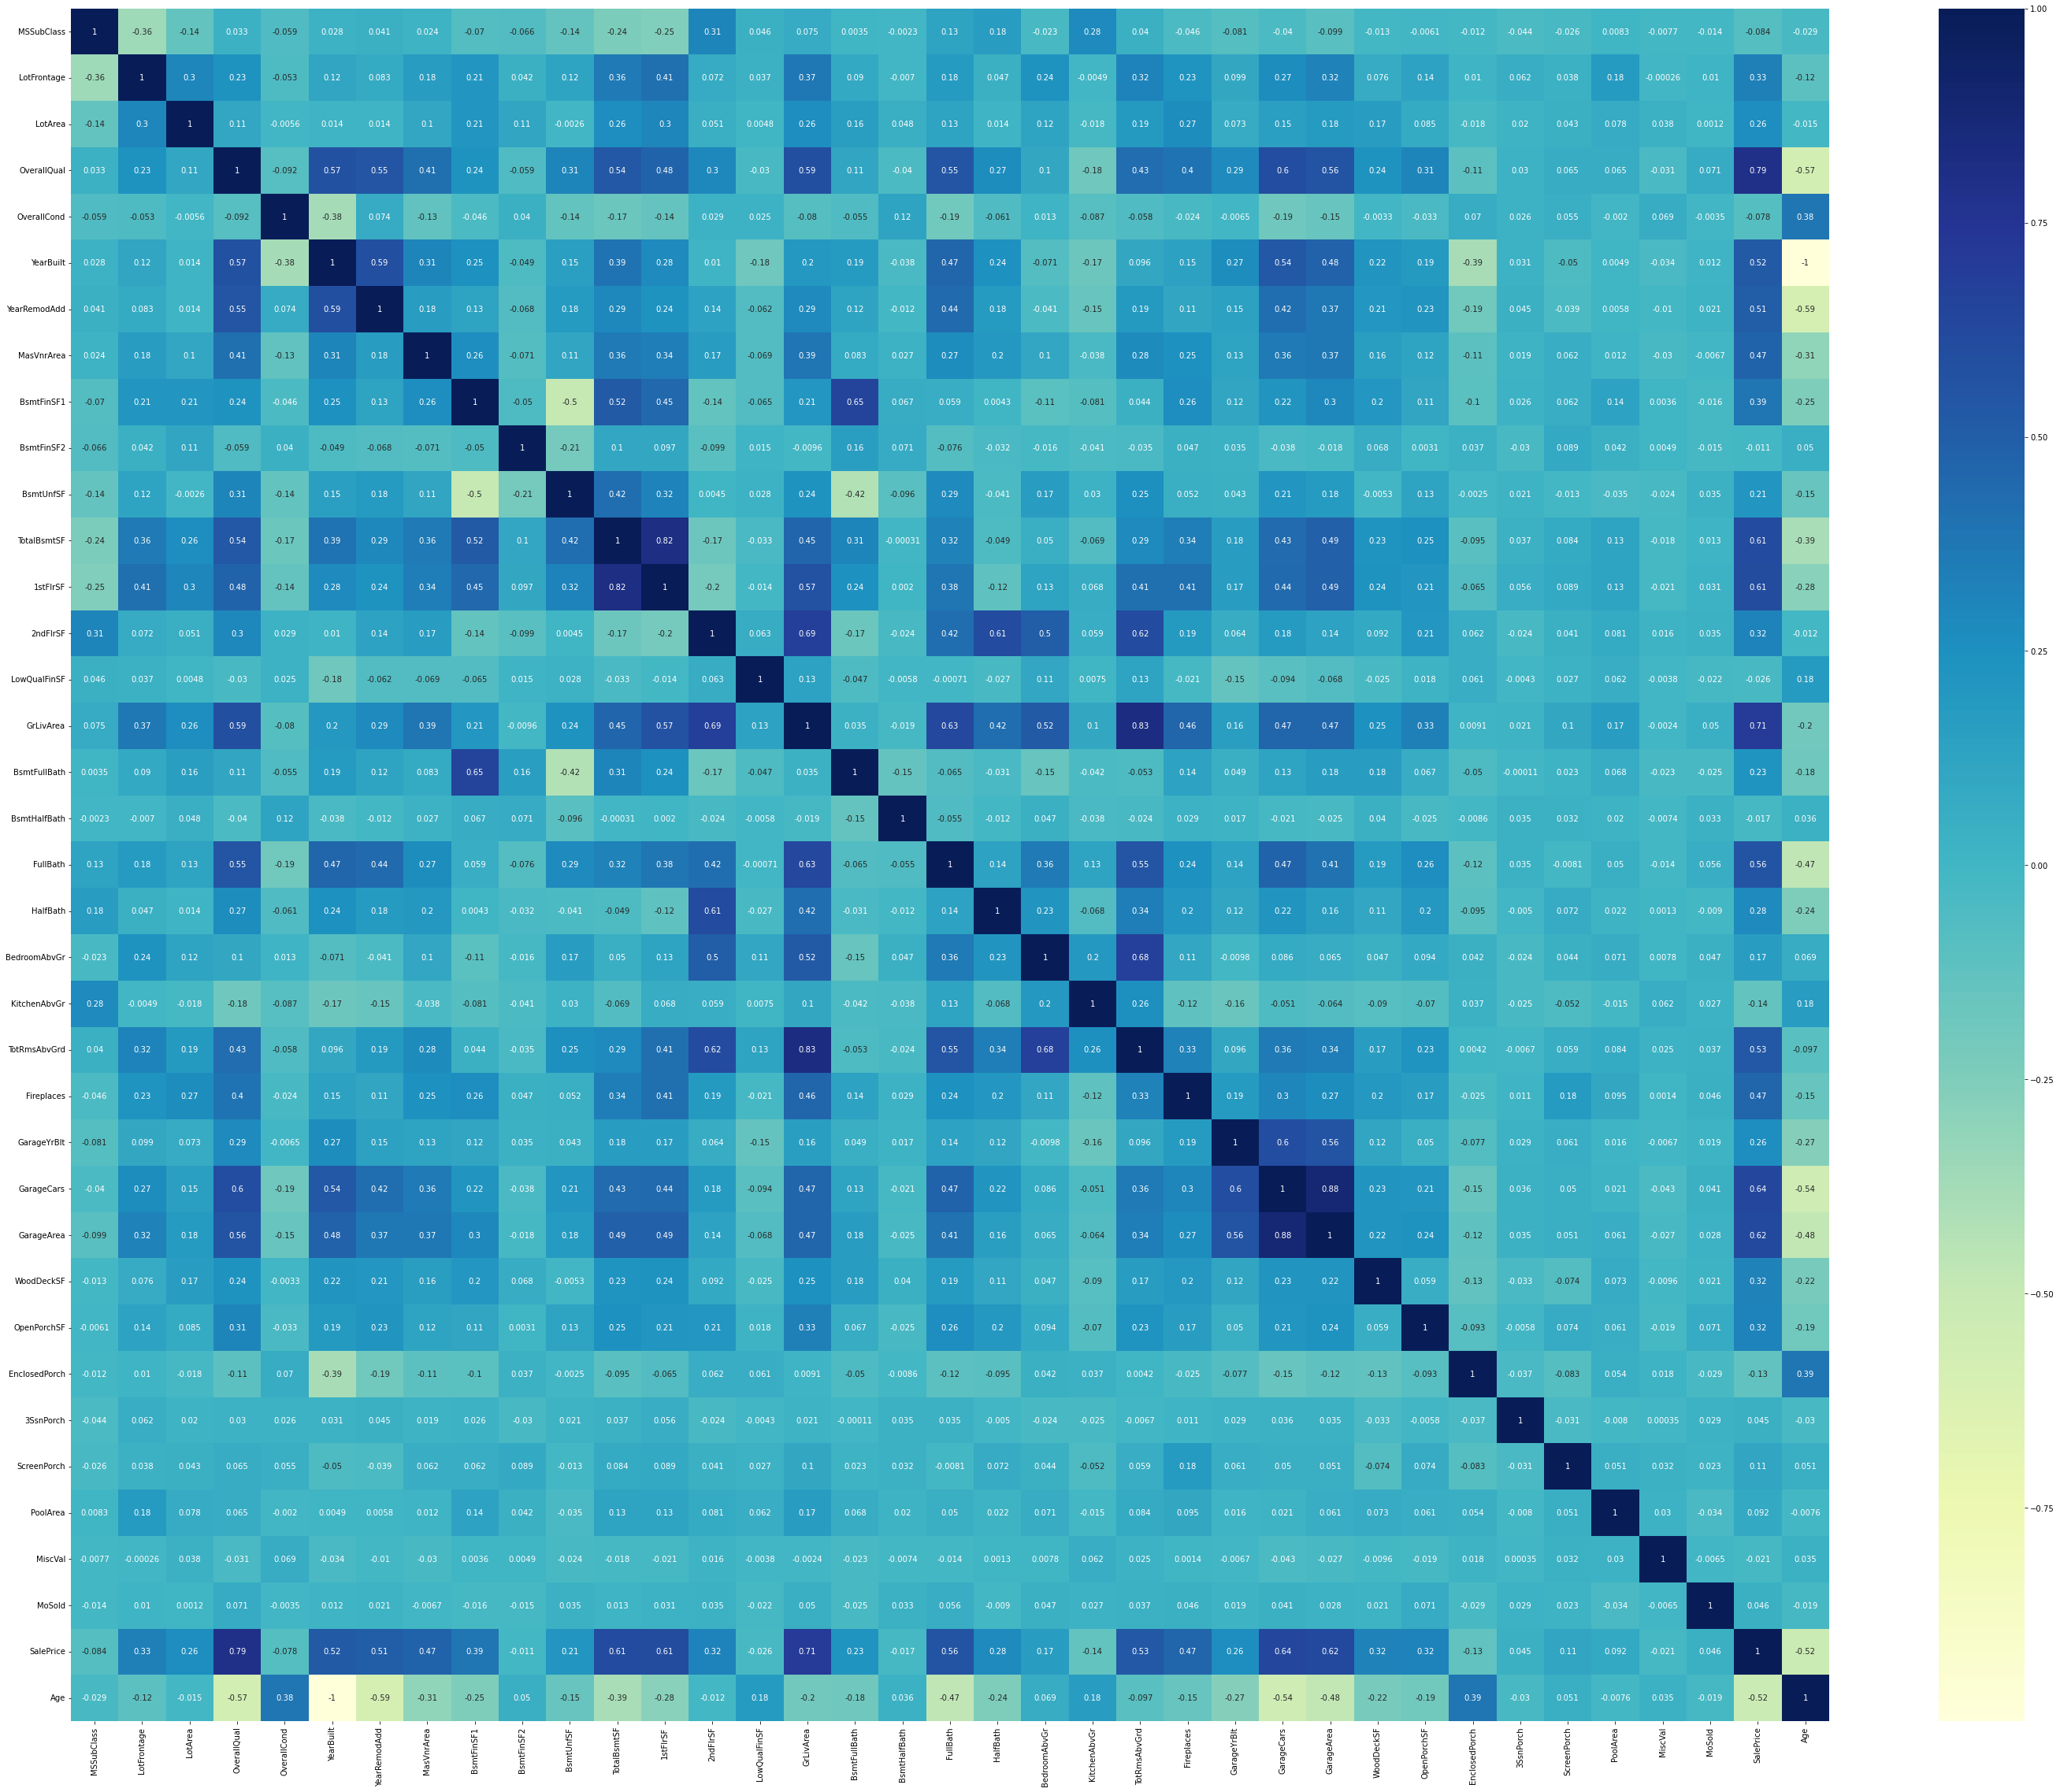

In [227]:
# plotting correlations on a heatmap

plt.figure(figsize=(50,40))

sns.heatmap(house_data[numeric_columns].corr(), cmap="YlGnBu", annot=True)
plt.show()

In [228]:
corr = house_data[numeric_columns].corr()

In [229]:
corr

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.083348  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.178469  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.214367  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.042463  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.124098 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363472  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.413773  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072388  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.037469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.368007  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.090343  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.006979  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.180534  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.047222  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.236840  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.004905 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.320518  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.233221  0.271364     0.396765    -0.023820   
GarageYrBlt     -0.080997     0.099196  0.072599     0.288998    -0.006515   
GarageCars      -0.040110     0.269539  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.323511  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.075542  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.137014  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010287 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.061945  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.037655  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.180819  0.077672     0.065166    -0.001985   
MiscVal         -0.007683    -0.000255  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.010451  0.001205     0.070815    -0.003511   
SalePrice       -0.084284     0.334771  0.263843     0.790982    -0.077856   
Age             -0.028746    -0.116223 -0.014832    -0.572629     0.377325   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.116685      0.083348    0.178469    0.214367    0.042463   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

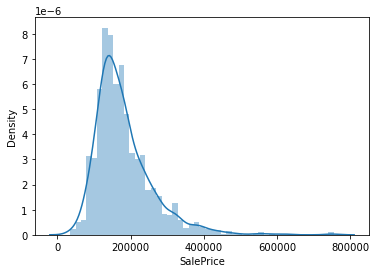

In [230]:
# Displot for sales price

sns.distplot(house_data['SalePrice'])

In [231]:
# Using log transformation for sales 

#Log Transformation
house_data['SalePrice']=np.log1p(house_data['SalePrice'])

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

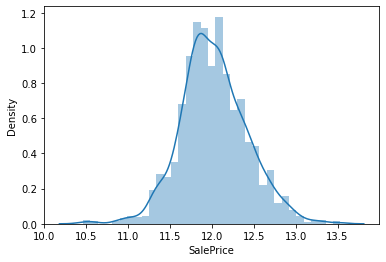

In [232]:
# Displot for sales price

sns.distplot(house_data['SalePrice'])

## Model Building

In [233]:
# split the data into training and test data set 

df_train,df_test = train_test_split(house_data,train_size=0.7,random_state=100)

In [234]:
df_train.shape

(1021, 159)

In [235]:
df_test.shape

(439, 159)

In [236]:
df_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1021.000000  1021.000000    1021.000000  1021.000000  1021.000000   
mean     58.472086    69.569050   10489.964740     6.093046     5.580803   
std      43.299192    22.090553   10308.062725     1.399636     1.092121   
min      20.000000    21.000000    1477.000000     1.000000     1.000000   
25%      20.000000    60.000000    7449.000000     5.000000     5.000000   
50%      50.000000    69.000000    9505.000000     6.000000     5.000000   
75%      70.000000    78.000000   11512.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1021.000000   1021.000000  1021.000000  1021.000000  1021.000000   
mean   1971.321254   1984.984329   104.489716   448.165524    50.087169   
std      30.321038     20.604962   187.341089   465.115135   170.847470   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   392.000000     0.000000   
75%    2000.000000   2004.000000   158.000000   712.000000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000   1021.000000   
mean    563.745348  1061.998041  1168.611166   343.540646      5.999021   
std     448.739203   459.098042   397.896911   435.498994     48.207914   
min       0.000000     0.000000   372.000000     0.000000      0.000000   
25%     216.000000   793.000000   876.000000     0.000000      0.000000   
50%     462.000000   994.000000  1086.000000     0.000000      0.000000   
75%     806.000000  1314.000000  1422.000000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    515.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1021.000000   1021.000000   1021.000000  1021.000000  1021.000000   
mean   1518.150833      0.439765      0.059745     1.567091     0.377081   
std     531.849898      0.525381      0.241230     0.551872     0.500807   
min     438.000000      0.000000      0.000000     0.000000     0.000000   
25%    1135.000000      0.000000      0.000000     1.000000     0.000000   
50%    1466.000000      0.000000      0.000000     2.000000     0.000000   
75%    1774.000000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1021.000000   1021.000000   1021.000000  1021.000000  1021.000000   
mean       2.856024      1.053869      6.504407     0.598433  1868.316357   
std        0.819993      0.230169      1.605514     0.645769   455.160037   
min        0.000000      1.000000      3.000000     0.000000     0.000000   
25%        2.000000      1.000000      5.000000     0.000000  1958.000000   
50%        3.000000      1.000000      6.000000     1.000000  1978.000000   
75%        3.000000      1.000000      7.000000     1.000000  2001.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1021.000000  1021.000000  1021.000000  1021.000000    1021.000000   
mean      1.771792   471.995103    92.641528    47.035260      23.241920   
std       0.746119   212.213075   124.479090    66.195468      63.167621   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   330.000000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    26.000000       0.000000   
75%       2.000000   576.000000   168.000000    70.000000   

In [237]:
# Rescale the numeric columns

scaler = StandardScaler()

df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])
df_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
318     0.035305     0.925326 -0.057261     0.648310    -0.532073   0.715324   
239    -0.195760    -0.795709 -0.169753    -0.066511    -1.448170  -0.868511   
986    -0.195760    -0.478677 -0.502762    -0.066511     2.216221  -2.023391   
1416    3.039142    -0.433386  0.082504    -1.496155     0.384025  -2.848305   
390    -0.195760    -0.886290 -0.202365    -0.781333     2.216221  -2.353356   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
318       0.389207    0.809137    1.159065   -0.293313  -0.454262   
239      -1.698692   -0.558025   -0.761831   -0.293313   0.172244   
986       0.874765   -0.558025   -0.964030   -0.293313  -0.175567   
1416     -1.698692   -0.558025   -0.964030   -0.293313   0.475464   
390      -1.698692   -0.558025   -0.445625    1.996400  -0.746334   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
318      0.621091  0.511410  2.137583     -0.124502   2.121655      1.066863   
239     -0.712611 -0.931882  0.793638     -0.124502  -0.058599     -0.837450   
986     -1.257424 -0.421449  0.667284     -0.124502   0.219811     -0.837450   
1416    -0.621082  0.194590  1.609195     -0.124502   1.451965     -0.837450   
390     -0.438025 -0.522027  0.143490     -0.124502  -0.284338      1.066863   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
318      -0.247791  0.784821  1.244440      1.395790     -0.234155   
239      -0.247791 -1.028080  1.244440      0.175669     -0.234155   
986      -0.247791 -1.028080 -0.753316     -1.044452     -0.234155   
1416     -0.247791  0.784821 -0.753316      1.395790      4.112612   
390      -0.247791 -1.028080 -0.753316      1.395790     -0.234155   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
318       1.555150    0.622148     0.274068    1.646935    0.867501   
239       0.308833    0.622148     0.177351   -1.034916   -1.188045   
986      -0.937484   -0.927153     0.179549   -1.034916   -1.023035   
1416      2.801467   -0.927153     0.225710    0.306009    0.414904   
390       0.308833   -0.927153     0.241096   -1.034916   -0.414858   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
318     1.988123     0.195951       1.912645  -0.121922    -0.275126   
239    -0.744598     1.405086      -0.368121  -0.121922    -0.275126   
986     2.422143    -0.710899      -0.368121  -0.121922    -0.275126   
1416   -0.744598    -0.710899       1.437486  -0.121922    -0.275126   
390    -0.744598     1.253944       1.405809  -0.121922    -0.275126   

      PoolArea   MiscVal    MoSold  SalePrice       Age  MSZoning_FV  \
318  -0.062302 -0.084263 -0.833178   1.123211 -0.675791            0   
239  -0.062302 -0.084263 -0.833178  -0.978867  0.939707            0   
986  -0.062302 -0.084263 -0.105172  -0.891116  1.961757            0   
1416 -0.062302 -0.084263 -0.833178  -0.775234  2.917868            0   
390  -0.062302 -0.084263 -0.833178  -0.848358  2.357389            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
318             0            1            0             0             0   
239             0            1            0             0             0   
986             0            0            1             0             0   
1416            0            0            1             0             0   
390             0            1            0             0             0   

      LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
318              1                  0              0              0   
239              1                  0              0              0   
986              1                  0              0              0   
1416             1                  0              0              0   
390              1                  0              0              0   

      LotConfig_Inside  Neighborhood_

In [238]:
# Describe the Training set

df_train.describe()

MSSubClass   LotFrontage       LotArea   OverallQual   OverallCond  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -2.005483e-16 -2.370506e-17 -9.108912e-17 -2.217184e-16  1.241797e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -8.889529e-01 -2.199712e+00 -8.747892e-01 -3.640619e+00 -4.196464e+00   
25%   -8.889529e-01 -4.333861e-01 -2.951529e-01 -7.813329e-01 -5.320725e-01   
50%   -1.957597e-01 -2.577250e-02 -9.559968e-02 -6.651132e-02 -5.320725e-01   
75%    2.663690e-01  3.818411e-01  9.919770e-02  6.483103e-01  3.840254e-01   
max    3.039142e+00  1.102509e+01  1.987332e+01  2.792775e+00  3.132319e+00   

          YearBuilt  YearRemodAdd    MasVnrArea    BsmtFinSF1    BsmtFinSF2  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean   6.861418e-16 -8.375061e-16 -9.416779e-17 -1.090650e-16  2.084523e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -3.277260e+00 -1.698692e+00 -5.580245e-01 -9.640305e-01 -2.933126e-01   
25%   -5.715419e-01 -8.732432e-01 -5.580245e-01 -9.640305e-01 -2.933126e-01   
50%    5.539286e-02  4.377630e-01 -5.580245e-01 -1.208154e-01 -2.933126e-01   
75%    9.463001e-01  9.233208e-01  2.857702e-01  5.675235e-01 -2.933126e-01   
max    1.276266e+00  1.214656e+00  7.986733e+00  1.117655e+01  8.338494e+00   

          BsmtUnfSF   TotalBsmtSF      1stFlrSF      2ndFlrSF  LowQualFinSF  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -1.870307e-17  1.908366e-16 -2.121766e-17 -1.143932e-16 -2.362350e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -1.256903e+00 -2.314361e+00 -2.003035e+00 -7.892303e-01 -1.245016e-01   
25%   -7.753184e-01 -5.862144e-01 -7.357548e-01 -7.892303e-01 -1.245016e-01   
50%   -2.268472e-01 -1.481848e-01 -2.077213e-01 -7.892303e-01 -1.245016e-01   
75%    5.401208e-01  5.491756e-01  6.371324e-01  8.832346e-01 -1.245016e-01   
max    3.951345e+00  1.100087e+01  8.859369e+00  3.954781e+00  1.056363e+01   

          GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath      HalfBath  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -6.230733e-17  1.539741e-16  1.427740e-16  2.068212e-16  2.353107e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -2.031927e+00 -8.374505e-01 -2.477915e-01 -2.840982e+00 -7.533165e-01   
25%   -7.207646e-01 -8.374505e-01 -2.477915e-01 -1.028080e+00 -7.533165e-01   
50%   -9.810360e-02 -8.374505e-01 -2.477915e-01  7.848212e-01 -7.533165e-01   
75%    4.812910e-01  1.066863e+00 -2.477915e-01  7.848212e-01  1.244440e+00   
max    7.757584e+00  4.875491e+00  8.047130e+00  2.597723e+00  3.242196e+00   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd    Fireplaces   GarageYrBlt  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   
mean  -3.523137e-17  6.416132e-16 -2.121494e-16 -4.822565e-16  2.419982e-16   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   
min   -3.484694e+00 -2.341549e-01 -2.183802e+00 -9.271528e-01 -4.106758e+00   
25%   -1.044452e+00 -2.341549e-01 -9.374844e-01 -9.271528e-01  1.971342e-01   
50%    1.756687e-01 -2.341549e-01 -3.143258e-01  6.221483e-01  2.410963e-01   
75%    1.756687e-01 -2.341549e-01  3.088327e-01  6.221483e-01  2.916527e-01   
max    6.276274e+00  8.459379e+00  4.670943e+00  3.720751e+00  3.114357e-01   

         GarageCars    GarageArea    WoodDeckSF   OpenPorchSF  EnclosedPorch  \
count  1.021000e+03  1.021000e+03  1.021000e+03  1.021000e+03   1.021000e+03   
mean   9.797365e-17 -6.403355e-17 -2.805461e-17 -2.587983e-17   1.125446e-17   
std    1.000490e+00  1.000490e+00  1.000490e+00  1.000490e+00   1.000490e+00   
min   -2.375841e+00 -2.225247e+00 -7.445984e-01 -7.108993e-01  -3.681207e-01   
25%   -1.034916e+00 -6.694436e-01 -7.445984e-01 -

In [239]:
# create X_train,y_train

# SalePrice is target variable so lets put it as y_train

y_train = df_train.pop('SalePrice')
X_train = df_train


In [240]:
y_train.shape

(1021,)

In [241]:
X_train.shape

(1021, 158)

### USe RFE for feature Elimination 


In [242]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=25)
rfe = rfe.fit(X_train,y_train)

In [243]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 62),
 ('LotFrontage', False, 99),
 ('LotArea', False, 68),
 ('OverallQual', True, 1),
 ('OverallCond', False, 31),
 ('YearBuilt', False, 50),
 ('YearRemodAdd', False, 129),
 ('MasVnrArea', False, 108),
 ('BsmtFinSF1', False, 13),
 ('BsmtFinSF2', False, 15),
 ('BsmtUnfSF', False, 16),
 ('TotalBsmtSF', False, 14),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 9),
 ('GrLivArea', False, 8),
 ('BsmtFullBath', False, 51),
 ('BsmtHalfBath', False, 101),
 ('FullBath', False, 71),
 ('HalfBath', False, 77),
 ('BedroomAbvGr', False, 86),
 ('KitchenAbvGr', False, 75),
 ('TotRmsAbvGrd', False, 61),
 ('Fireplaces', False, 81),
 ('GarageYrBlt', False, 106),
 ('GarageCars', False, 19),
 ('GarageArea', False, 95),
 ('WoodDeckSF', False, 90),
 ('OpenPorchSF', False, 127),
 ('EnclosedPorch', False, 98),
 ('3SsnPorch', False, 100),
 ('ScreenPorch', False, 91),
 ('PoolArea', False, 84),
 ('MiscVal', False, 130),
 ('MoSold', False, 133),
 ('Age', False, 30),

In [244]:
# Columns using rfe_support

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior2nd_CBlock', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'BsmtExposure_Gd', 'Foundation_Stone', 'BsmtQual_NA', 'KitchenQual_Fa',
       'GarageType_NA'],
      dtype='object')

In [245]:
# Creating xtrain with rfe provided columns 

X_train_rfe = X_train[col]

In [246]:
#adding a constant variable

X_train_rfe = sm.add_constant(X_train_rfe)

In [247]:
# Create a linear regression model 

lm = sm.OLS(y_train,X_train_rfe).fit() 

In [248]:
# Summary of model 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.1
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:25:41   Log-Likelihood:                -504.94
No. Observations:                1021   AIC:                             1060.
Df Residuals:                     996   BIC:                             1183.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3162      0.156     -8.459      0.000      -1.622      -1.011
OverallQual              0.3713      0.020     18.138      0.000       0.331       0.411
1stFlrSF                 0.3313      0.017     19.490      0.000       0.298       0.365
2ndFlrSF                 0.2582      0.015     17.364      0.000       0.229       0.287
MSZoning_FV              1.0737      0.197      5.450      0.000       0.687       1.460
MSZoning_RH              1.0995      0.190      5.796      0.000       0.727       1.472
MSZoning_RL              1.2880      0.156      8.258      0.000       0.982       1.594
MSZoning_RM              0.8544      0.158      5.412      0.000       0.545       1.164
Neighborhood_BrDale     -0.2991      0.122     -2.442      0.015      -0.539      -0.059
Neighborhood_ClearCr     0.3661      0.094      3.906      0.000       0.182       0.550
Neighborhood_Crawfor     0.3181      0.074      4.278      0.000       0.172       0.464
Neighborhood_Edwards    -0.2825      0.051     -5.495      0.000      -0.383      -0.182
Neighborhood_NridgHt     0.3567      0.061      5.880      0.000       0.238       0.476
Neighborhood_Somerst     0.3945      0.108      3.650      0.000       0.182       0.606
Neighborhood_StoneBr     0.2586      0.116      2.225      0.026       0.031       0.487
Exterior1st_BrkComm     -0.7665      0.292     -2.622      0.009      -1.340      -0.193
Exterior1st_BrkFace      0.2157      0.077      2.793      0.005       0.064       0.367
Exterior1st_CBlock      -0.2097      0.202     -1.041      0.298      -0.605       0.186
Exterior2nd_CBlock      -0.2097      0.202     -1.041      0.298      -0.605       0.186
Exterior2nd_Stucco      -0.4207      0.094     -4.469      0.000      -0.605      -0.236
Exterior2nd_VinylSd      0.2414      0.030      8.059      0.000       0.183       0.300
BsmtExposure_Gd          0.3066      0.046      6.710      0.000       0.217       0.396
Foundation_Stone         0.3277      0.237      1.385      0.166      -0.137       0.792
BsmtQual_NA             -0.3607      0.080     -4.521      0.000      -0.517      -0.204
KitchenQual_Fa          -0.2320      0.083     -2.792      0.005      -0.395      -0.069
GarageType_NA           -0.3014      0.059     -5.118      0.000      -0.417      -0.186
==============================================================================
Omnibus:                      495.872   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8977.909
Skew:                          -1.779   Prob(JB):                         0.00
Kurtosis:                      17.085   Cond. No.                     1.38e+16
==============================================================================

Notes:
[1] Standard Errors 

In [249]:
# Drop Exterior1st_CBlock and Exterior2nd_CBlock

X_train_new = X_train_rfe.drop(['Exterior1st_CBlock', 'Exterior2nd_CBlock'],axis=1)

In [250]:
# building Model Again 

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [251]:
# Summary 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     231.7
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:25:41   Log-Likelihood:                -505.50
No. Observations:                1021   AIC:                             1059.
Df Residuals:                     997   BIC:                             1177.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3150      0.156     -8.451      0.000      -1.620      -1.010
OverallQual              0.3725      0.020     18.225      0.000       0.332       0.413
1stFlrSF                 0.3313      0.017     19.484      0.000       0.298       0.365
2ndFlrSF                 0.2576      0.015     17.337      0.000       0.228       0.287
MSZoning_FV              1.0727      0.197      5.445      0.000       0.686       1.459
MSZoning_RH              1.0984      0.190      5.790      0.000       0.726       1.471
MSZoning_RL              1.2860      0.156      8.245      0.000       0.980       1.592
MSZoning_RM              0.8535      0.158      5.406      0.000       0.544       1.163
Neighborhood_BrDale     -0.2991      0.122     -2.442      0.015      -0.539      -0.059
Neighborhood_ClearCr     0.3672      0.094      3.918      0.000       0.183       0.551
Neighborhood_Crawfor     0.3187      0.074      4.285      0.000       0.173       0.465
Neighborhood_Edwards    -0.2814      0.051     -5.474      0.000      -0.382      -0.181
Neighborhood_NridgHt     0.3556      0.061      5.862      0.000       0.237       0.475
Neighborhood_Somerst     0.3934      0.108      3.641      0.000       0.181       0.605
Neighborhood_StoneBr     0.2575      0.116      2.216      0.027       0.029       0.486
Exterior1st_BrkComm     -0.7665      0.292     -2.622      0.009      -1.340      -0.193
Exterior1st_BrkFace      0.2159      0.077      2.796      0.005       0.064       0.367
Exterior2nd_Stucco      -0.4203      0.094     -4.464      0.000      -0.605      -0.236
Exterior2nd_VinylSd      0.2417      0.030      8.069      0.000       0.183       0.300
BsmtExposure_Gd          0.3063      0.046      6.703      0.000       0.217       0.396
Foundation_Stone         0.3281      0.237      1.386      0.166      -0.136       0.792
BsmtQual_NA             -0.3593      0.080     -4.504      0.000      -0.516      -0.203
KitchenQual_Fa          -0.2313      0.083     -2.784      0.005      -0.394      -0.068
GarageType_NA           -0.3006      0.059     -5.104      0.000      -0.416      -0.185
==============================================================================
Omnibus:                      495.434   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8963.554
Skew:                          -1.777   Prob(JB):                         0.00
Kurtosis:                      17.074   Cond. No.                         38.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
#check VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features     VIF
0                  const  153.17
6            MSZoning_RL   25.93
7            MSZoning_RM   20.20
4            MSZoning_FV   10.34
13  Neighborhood_Somerst    4.09
5            MSZoning_RH    2.86
1            OverallQual    2.64
2               1stFlrSF    1.83
3               2ndFlrSF    1.40
12  Neighborhood_NridgHt    1.27
18   Exterior2nd_VinylSd    1.26
19       BsmtExposure_Gd    1.18
23         GarageType_NA    1.16
11  Neighborhood_Edwards    1.15
22        KitchenQual_Fa    1.12
21           BsmtQual_NA    1.11
8    Neighborhood_BrDale    1.10
16   Exterior1st_BrkFace    1.08
17    Exterior2nd_Stucco    1.08
9   Neighborhood_ClearCr    1.07
14  Neighborhood_StoneBr    1.07
10  Neighborhood_Crawfor    1.06
15   Exterior1st_BrkComm    1.06
20      Foundation_Stone    1.04

In [253]:
# Drop MSZoning_RL column 

X_train_new = X_train_new.drop(['MSZoning_RL'],axis=1)

In [254]:
# building Model Again 

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [255]:
# Summary 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.1
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:25:41   Log-Likelihood:                -539.17
No. Observations:                1021   AIC:                             1124.
Df Residuals:                     998   BIC:                             1238.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0435      0.021     -2.036      0.042      -0.085      -0.002
OverallQual              0.3896      0.021     18.546      0.000       0.348       0.431
1stFlrSF                 0.3304      0.018     18.813      0.000       0.296       0.365
2ndFlrSF                 0.2533      0.015     16.513      0.000       0.223       0.283
MSZoning_FV             -0.2015      0.126     -1.597      0.111      -0.449       0.046
MSZoning_RH             -0.1513      0.118     -1.284      0.199      -0.383       0.080
MSZoning_RM             -0.4088      0.040    -10.259      0.000      -0.487      -0.331
Neighborhood_BrDale     -0.3026      0.127     -2.392      0.017      -0.551      -0.054
Neighborhood_ClearCr     0.3851      0.097      3.978      0.000       0.195       0.575
Neighborhood_Crawfor     0.3282      0.077      4.273      0.000       0.178       0.479
Neighborhood_Edwards    -0.2517      0.053     -4.751      0.000      -0.356      -0.148
Neighborhood_NridgHt     0.3401      0.063      5.430      0.000       0.217       0.463
Neighborhood_Somerst     0.3814      0.112      3.418      0.001       0.162       0.600
Neighborhood_StoneBr     0.2440      0.120      2.033      0.042       0.009       0.480
Exterior1st_BrkComm     -0.7362      0.302     -2.438      0.015      -1.329      -0.144
Exterior1st_BrkFace      0.2219      0.080      2.782      0.006       0.065       0.378
Exterior2nd_Stucco      -0.4165      0.097     -4.282      0.000      -0.607      -0.226
Exterior2nd_VinylSd      0.2481      0.031      8.020      0.000       0.187       0.309
BsmtExposure_Gd          0.3049      0.047      6.459      0.000       0.212       0.398
Foundation_Stone         0.3566      0.244      1.459      0.145      -0.123       0.836
BsmtQual_NA             -0.3287      0.082     -3.993      0.000      -0.490      -0.167
KitchenQual_Fa          -0.3093      0.085     -3.627      0.000      -0.477      -0.142
GarageType_NA           -0.3227      0.061     -5.310      0.000      -0.442      -0.203
==============================================================================
Omnibus:                      550.872   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9717.190
Skew:                          -2.069   Prob(JB):                         0.00
Kurtosis:                      17.536   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [256]:
#check VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
12  Neighborhood_Somerst  4.08
4            MSZoning_FV  3.98
0                  const  2.70
1            OverallQual  2.62
2               1stFlrSF  1.83
3               2ndFlrSF  1.40
11  Neighborhood_NridgHt  1.27
17   Exterior2nd_VinylSd  1.26
6            MSZoning_RM  1.21
18       BsmtExposure_Gd  1.18
10  Neighborhood_Edwards  1.15
22         GarageType_NA  1.15
20           BsmtQual_NA  1.11
21        KitchenQual_Fa  1.11
7    Neighborhood_BrDale  1.10
15   Exterior1st_BrkFace  1.08
16    Exterior2nd_Stucco  1.08
8   Neighborhood_ClearCr  1.07
13  Neighborhood_StoneBr  1.07
9   Neighborhood_Crawfor  1.06
14   Exterior1st_BrkComm  1.06
19      Foundation_Stone  1.04
5            MSZoning_RH  1.03

In [257]:
# Removing MSZoning_RH as it is having high p value 

X_train_new = X_train_new.drop(['MSZoning_RH'],axis=1)

In [258]:
# building Model Again 

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [259]:
# Summary 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     234.5
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:25:42   Log-Likelihood:                -540.01
No. Observations:                1021   AIC:                             1124.
Df Residuals:                     999   BIC:                             1232.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0458      0.021     -2.153      0.032      -0.088      -0.004
OverallQual              0.3904      0.021     18.586      0.000       0.349       0.432
1stFlrSF                 0.3303      0.018     18.800      0.000       0.296       0.365
2ndFlrSF                 0.2527      0.015     16.474      0.000       0.223       0.283
MSZoning_FV             -0.2006      0.126     -1.589      0.112      -0.448       0.047
MSZoning_RM             -0.4050      0.040    -10.188      0.000      -0.483      -0.327
Neighborhood_BrDale     -0.3032      0.127     -2.396      0.017      -0.552      -0.055
Neighborhood_ClearCr     0.3873      0.097      4.000      0.000       0.197       0.577
Neighborhood_Crawfor     0.3261      0.077      4.246      0.000       0.175       0.477
Neighborhood_Edwards    -0.2487      0.053     -4.698      0.000      -0.353      -0.145
Neighborhood_NridgHt     0.3409      0.063      5.440      0.000       0.218       0.464
Neighborhood_Somerst     0.3824      0.112      3.425      0.001       0.163       0.601
Neighborhood_StoneBr     0.2449      0.120      2.040      0.042       0.009       0.480
Exterior1st_BrkComm     -0.7321      0.302     -2.424      0.016      -1.325      -0.139
Exterior1st_BrkFace      0.2243      0.080      2.811      0.005       0.068       0.381
Exterior2nd_Stucco      -0.4222      0.097     -4.345      0.000      -0.613      -0.232
Exterior2nd_VinylSd      0.2482      0.031      8.023      0.000       0.188       0.309
BsmtExposure_Gd          0.3062      0.047      6.487      0.000       0.214       0.399
Foundation_Stone         0.3611      0.244      1.477      0.140      -0.119       0.841
BsmtQual_NA             -0.3303      0.082     -4.012      0.000      -0.492      -0.169
KitchenQual_Fa          -0.3158      0.085     -3.709      0.000      -0.483      -0.149
GarageType_NA           -0.3310      0.060     -5.477      0.000      -0.450      -0.212
==============================================================================
Omnibus:                      550.286   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9621.439
Skew:                          -2.069   Prob(JB):                         0.00
Kurtosis:                      17.458   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
#check VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
11  Neighborhood_Somerst  4.08
4            MSZoning_FV  3.98
0                  const  2.68
1            OverallQual  2.61
2               1stFlrSF  1.83
3               2ndFlrSF  1.39
10  Neighborhood_NridgHt  1.27
16   Exterior2nd_VinylSd  1.26
5            MSZoning_RM  1.20
17       BsmtExposure_Gd  1.18
21         GarageType_NA  1.14
9   Neighborhood_Edwards  1.14
19           BsmtQual_NA  1.11
20        KitchenQual_Fa  1.11
6    Neighborhood_BrDale  1.10
14   Exterior1st_BrkFace  1.08
15    Exterior2nd_Stucco  1.07
7   Neighborhood_ClearCr  1.07
12  Neighborhood_StoneBr  1.07
8   Neighborhood_Crawfor  1.06
13   Exterior1st_BrkComm  1.06
18      Foundation_Stone  1.04

In [261]:
# Removing MSZoning_FV as it is having high p value 

X_train_new = X_train_new.drop(['MSZoning_FV'],axis=1)

In [262]:
# building Model Again 

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [263]:
# Summary 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.8
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:25:42   Log-Likelihood:                -541.30
No. Observations:                1021   AIC:                             1125.
Df Residuals:                    1000   BIC:                             1228.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0471      0.021     -2.212      0.027      -0.089      -0.005
OverallQual              0.3904      0.021     18.573      0.000       0.349       0.432
1stFlrSF                 0.3337      0.017     19.131      0.000       0.300       0.368
2ndFlrSF                 0.2508      0.015     16.387      0.000       0.221       0.281
MSZoning_RM             -0.4025      0.040    -10.125      0.000      -0.480      -0.324
Neighborhood_BrDale     -0.2984      0.127     -2.357      0.019      -0.547      -0.050
Neighborhood_ClearCr     0.3876      0.097      4.001      0.000       0.197       0.578
Neighborhood_Crawfor     0.3269      0.077      4.253      0.000       0.176       0.478
Neighborhood_Edwards    -0.2486      0.053     -4.692      0.000      -0.353      -0.145
Neighborhood_NridgHt     0.3361      0.063      5.367      0.000       0.213       0.459
Neighborhood_Somerst     0.2320      0.059      3.916      0.000       0.116       0.348
Neighborhood_StoneBr     0.2422      0.120      2.016      0.044       0.006       0.478
Exterior1st_BrkComm     -0.7329      0.302     -2.424      0.016      -1.326      -0.140
Exterior1st_BrkFace      0.2211      0.080      2.771      0.006       0.065       0.378
Exterior2nd_Stucco      -0.4216      0.097     -4.335      0.000      -0.612      -0.231
Exterior2nd_VinylSd      0.2519      0.031      8.157      0.000       0.191       0.312
BsmtExposure_Gd          0.3046      0.047      6.448      0.000       0.212       0.397
Foundation_Stone         0.3630      0.245      1.484      0.138      -0.117       0.843
BsmtQual_NA             -0.3298      0.082     -4.003      0.000      -0.491      -0.168
KitchenQual_Fa          -0.3144      0.085     -3.690      0.000      -0.482      -0.147
GarageType_NA           -0.3297      0.060     -5.450      0.000      -0.448      -0.211
==============================================================================
Omnibus:                      553.140   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9867.921
Skew:                          -2.077   Prob(JB):                         0.00
Kurtosis:                      17.653   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
# Removing Foundation_Stone as it is having high p value 

X_train_new = X_train_new.drop(['Foundation_Stone'],axis=1)

In [265]:
# building Model Again 

X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

In [266]:
# Summary 

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     258.3
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:25:42   Log-Likelihood:                -542.42
No. Observations:                1021   AIC:                             1125.
Df Residuals:                    1001   BIC:                             1223.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0461      0.021     -2.165      0.031      -0.088      -0.004
OverallQual              0.3908      0.021     18.581      0.000       0.350       0.432
1stFlrSF                 0.3339      0.017     19.129      0.000       0.300       0.368
2ndFlrSF                 0.2515      0.015     16.436      0.000       0.221       0.282
MSZoning_RM             -0.3986      0.040    -10.044      0.000      -0.477      -0.321
Neighborhood_BrDale     -0.3030      0.127     -2.392      0.017      -0.552      -0.054
Neighborhood_ClearCr     0.3874      0.097      3.996      0.000       0.197       0.578
Neighborhood_Crawfor     0.3229      0.077      4.200      0.000       0.172       0.474
Neighborhood_Edwards    -0.2499      0.053     -4.716      0.000      -0.354      -0.146
Neighborhood_NridgHt     0.3356      0.063      5.356      0.000       0.213       0.459
Neighborhood_Somerst     0.2314      0.059      3.903      0.000       0.115       0.348
Neighborhood_StoneBr     0.2412      0.120      2.007      0.045       0.005       0.477
Exterior1st_BrkComm     -0.7375      0.302     -2.439      0.015      -1.331      -0.144
Exterior1st_BrkFace      0.2205      0.080      2.761      0.006       0.064       0.377
Exterior2nd_Stucco      -0.4056      0.097     -4.194      0.000      -0.595      -0.216
Exterior2nd_VinylSd      0.2504      0.031      8.108      0.000       0.190       0.311
BsmtExposure_Gd          0.3037      0.047      6.427      0.000       0.211       0.396
BsmtQual_NA             -0.3311      0.082     -4.016      0.000      -0.493      -0.169
KitchenQual_Fa          -0.3006      0.085     -3.548      0.000      -0.467      -0.134
GarageType_NA           -0.3329      0.060     -5.504      0.000      -0.452      -0.214
==============================================================================
Omnibus:                      554.203   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10047.278
Skew:                          -2.077   Prob(JB):                         0.00
Kurtosis:                      17.796   Cond. No.                         28.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [267]:
#check VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

Features   VIF
0                  const  2.67
1            OverallQual  2.61
2               1stFlrSF  1.80
3               2ndFlrSF  1.38
9   Neighborhood_NridgHt  1.26
15   Exterior2nd_VinylSd  1.25
4            MSZoning_RM  1.19
16       BsmtExposure_Gd  1.18
10  Neighborhood_Somerst  1.15
8   Neighborhood_Edwards  1.14
19         GarageType_NA  1.14
17           BsmtQual_NA  1.11
5    Neighborhood_BrDale  1.10
18        KitchenQual_Fa  1.09
11  Neighborhood_StoneBr  1.07
13   Exterior1st_BrkFace  1.07
6   Neighborhood_ClearCr  1.07
7   Neighborhood_Crawfor  1.06
12   Exterior1st_BrkComm  1.06
14    Exterior2nd_Stucco  1.06

All the p values are under 0.05 
All VIF values are under 5 

#### Analysis on Trainignn Dataset

In [268]:
y_train_pred = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

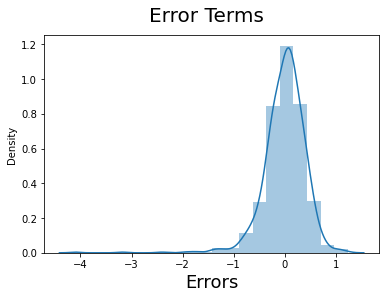

In [269]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [270]:
# R2 on Training model 

r2 = r2_score(y_true = y_train,y_pred = y_train_pred)
r2

0.8305755163851766

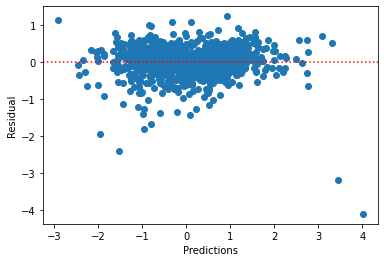

In [271]:
y_res = (y_train - y_train_pred)
plt.scatter( y_train_pred , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [272]:
#scale Test set
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])
df_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
1436   -0.888953    -0.433386 -0.144614    -1.496155     0.384025  -0.010600   
57      0.035305     0.880036  0.112107     0.648310    -0.532073   1.078286   
780    -0.888953    -0.297515 -0.253806     0.648310    -0.532073   0.781317   
382     0.035305     0.427132 -0.120835     0.648310    -0.532073   1.144279   
1170    0.497433     0.291260 -0.059203    -0.066511     0.384025   0.187379   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1436     -0.679020   -0.558025    0.361022   -0.293313  -0.703973   
57        0.923321   -0.558025   -0.964030   -0.293313   0.660517   
780       0.534875   -0.355087   -0.964030   -0.293313   1.501060   
382       1.020432   -0.558025   -0.964030   -0.293313   0.836652   
1170     -0.387685   -0.558025    0.158822   -0.293313   0.022863   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1436    -0.431488 -0.765928 -0.789230     -0.124502  -1.230557     -0.837450   
57      -0.440205 -0.775986  1.186484     -0.124502   0.379709     -0.837450   
780      0.381373  0.212191 -0.789230     -0.124502  -0.498789     -0.837450   
382     -0.268044 -0.577345  1.181889     -0.124502   0.524557     -0.837450   
1170     0.074099 -0.127259 -0.789230     -0.124502  -0.752744      1.066863   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1436     -0.247791 -1.028080 -0.753316      0.175669     -0.234155   
57       -0.247791  0.784821  1.244440      0.175669     -0.234155   
780      -0.247791  0.784821 -0.753316      0.175669     -0.234155   
382      -0.247791  0.784821  1.244440      0.175669     -0.234155   
1170     -0.247791 -1.028080 -0.753316      0.175669     -0.234155   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
1436     -0.937484   -0.927153     0.232304    0.306009    0.264038   
57        0.308833   -0.927153     0.298247    0.306009    0.438477   
780      -0.314326    0.622148     0.278464    0.306009   -0.329996   
382       0.931991   -0.927153     0.302643    0.306009    0.787354   
1170     -0.314326    0.622148     0.238898   -1.034916   -0.537436   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1436   -0.744598    -0.710899      -0.368121  -0.121922    -0.275126   
57     -0.744598     0.347093      -0.368121  -0.121922    -0.275126   
780     1.023633    -0.393502      -0.368121  -0.121922    -0.275126   
382     0.412789     0.090152      -0.368121  -0.121922    -0.275126   
1170    0.886997    -0.710899      -0.368121  -0.121922    -0.275126   

       PoolArea   MiscVal    MoSold  SalePrice       Age  MSZoning_FV  \
1436  -0.062302 -0.084263 -0.469175  -0.816760 -0.016404            0   
57    -0.062302 -0.084263  0.622834   0.416830 -1.137362            0   
780   -0.062302 -0.084263 -0.105172   0.138892 -0.807668            0   
382   -0.062302 -0.084263 -0.833178   0.626142 -1.170331            0   
1170  16.629857 -0.084263  0.258831   0.066189 -0.181251            0   

      MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  \
1436            0            1            0             0             0   
57              0            1            0             0             0   
780             0            1            0             0             0   
382             0            1            0             0             0   
1170            0            1            0             0             0   

      LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
1436             1                  0              1              0   
57               0                  0              0              0   
780              1                  0              0              0   
382              0                  0              0              0   
1170             1                  0              0              0   

      LotConfig_Inside  Neighbo

In [273]:
#create y_test and X_test

y_test = df_test.pop('SalePrice')
X_test = df_test

In [274]:
X_train_new.columns

Index(['const', 'OverallQual', '1stFlrSF', '2ndFlrSF', 'MSZoning_RM',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'BsmtExposure_Gd',
       'BsmtQual_NA', 'KitchenQual_Fa', 'GarageType_NA'],
      dtype='object')

In [275]:
# Creating X_test_new dataframe by dropping variables from X_test
#X_train_new.columns

X_train_columns = ['OverallQual', '1stFlrSF', '2ndFlrSF', 'MSZoning_RM',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'BsmtExposure_Gd',
       'BsmtQual_NA', 'KitchenQual_Fa', 'GarageType_NA']
X_test_new = X_test[X_train_columns]

In [276]:
# Adding a constant variable 

X_test_new = sm.add_constant(X_test_new)

In [277]:
#Running the Linear Model on test 

test_lm = sm.OLS(y_test,X_test_new).fit()

In [278]:
# Summary 

test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     127.8
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          1.24e-157
Time:                        13:25:42   Log-Likelihood:                -223.33
No. Observations:                 439   AIC:                             484.7
Df Residuals:                     420   BIC:                             562.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0068      0.032     -0.212      0.832      -0.070       0.056
OverallQual              0.4399      0.033     13.175      0.000       0.374       0.506
1stFlrSF                 0.3619      0.031     11.851      0.000       0.302       0.422
2ndFlrSF                 0.2713      0.024     11.252      0.000       0.224       0.319
MSZoning_RM             -0.3623      0.061     -5.931      0.000      -0.482      -0.242
Neighborhood_BrDale     -0.1269      0.215     -0.590      0.555      -0.549       0.296
Neighborhood_ClearCr     0.0973      0.156      0.625      0.532      -0.209       0.403
Neighborhood_Crawfor     0.2300      0.104      2.222      0.027       0.027       0.434
Neighborhood_Edwards    -0.0612      0.092     -0.663      0.507      -0.243       0.120
Neighborhood_NridgHt     0.4152      0.112      3.712      0.000       0.195       0.635
Neighborhood_Somerst     0.1096      0.089      1.226      0.221      -0.066       0.285
Neighborhood_StoneBr     0.5435      0.129      4.218      0.000       0.290       0.797
Exterior1st_BrkComm   3.087e-17   1.29e-16      0.239      0.811   -2.23e-16    2.84e-16
Exterior1st_BrkFace     -0.0025      0.098     -0.026      0.979      -0.196       0.191
Exterior2nd_Stucco      -0.0525      0.175     -0.300      0.765      -0.397       0.292
Exterior2nd_VinylSd      0.1299      0.046      2.850      0.005       0.040       0.220
BsmtExposure_Gd          0.2963      0.081      3.670      0.000       0.138       0.455
BsmtQual_NA             -0.4623      0.152     -3.050      0.002      -0.760      -0.164
KitchenQual_Fa          -0.1633      0.130     -1.255      0.210      -0.419       0.093
GarageType_NA           -0.5730      0.097     -5.936      0.000      -0.763      -0.383
==============================================================================
Omnibus:                      156.523   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              789.187
Skew:                          -1.467   Prob(JB):                    4.27e-172
Kurtosis:                       8.877   Cond. No.                     3.77e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.36e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [279]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Calculate r2 score of Test model

In [280]:
r2 = r2_score(y_true = y_test,y_pred = y_pred)
r2

0.8244610228561599

Text(0, 0.5, 'y_pred')

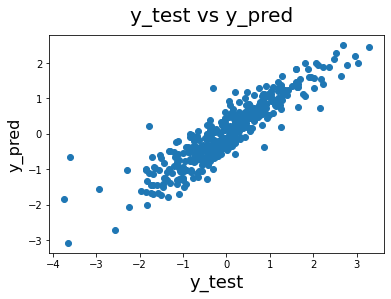

In [281]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)   

In [282]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [283]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [284]:
X_train_new.columns

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'MSZoning_RM',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'BsmtExposure_Gd',
       'BsmtQual_NA', 'KitchenQual_Fa', 'GarageType_NA'],
      dtype='object')

In [285]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8305755163851766
0.8244610228561599
172.9823977707348
80.82303941545514
0.1694244836148235
0.18410715128805272


### Ridge Regression

In [286]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [287]:
# Printing the best hyperparameter alpha

print(model_cv.best_params_)

{'alpha': 7.0}


In [288]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised

alpha = 7.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 0.40943745  0.33447557  0.24389853 -0.39394887 -0.19647505  0.28827289
  0.24938515 -0.25474418  0.2756895   0.19198552  0.1356325  -0.17052532
  0.16952385 -0.29273783  0.241207    0.28526134 -0.27277599 -0.26197882
 -0.29662187]


In [289]:
# results data frame
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.002542      0.000696         0.001555        0.000591      0.0001   
1       0.002430      0.000382         0.001073        0.000071       0.001   
2       0.001837      0.000418         0.001022        0.000023        0.01   
3       0.000411      0.000482         0.000401        0.000491        0.05   
4       0.000000      0.000000         0.003125        0.006249         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.269007          -0.301851          -0.324132   
1   {'alpha': 0.001}          -0.269006          -0.301851          -0.324131   
2    {'alpha': 0.01}          -0.268994          -0.301850          -0.324119   
3    {'alpha': 0.05}          -0.268942          -0.301844          -0.324065   
4     {'alpha': 0.1}          -0.268877          -0.301837          -0.323999   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.293853          -0.301119        -0.297993        0.017693   
1          -0.293853          -0.301119        -0.297992        0.017693   
2          -0.293847          -0.301118        -0.297985        0.017694   
3          -0.293822          -0.301112        -0.297957        0.017695   
4          -0.293791          -0.301105        -0.297922        0.017698   

   rank_test_score  split0_train_score  split1_train_score  \
0               23           -0.295821           -0.281755   
1               22           -0.295821           -0.281755   
2               21           -0.295820           -0.281756   
3               20           -0.295817           -0.281763   
4               19           -0.295814           -0.281772   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.282929           -0.290969           -0.289120   
1           -0.282929           -0.290968           -0.289120   
2           -0.282926           -0.290964           -0.289117   
3           -0.282911           -0.290946           -0.289105   
4           -0.282893           -0.290925           -0.289090   

   mean_train_score  std_train_score  
0         -0.288119         0.005213  
1         -0.288119         0.005213  
2         -0.288117         0.005212  
3         -0.288109         0.005210  
4         -0.288099         0.005208

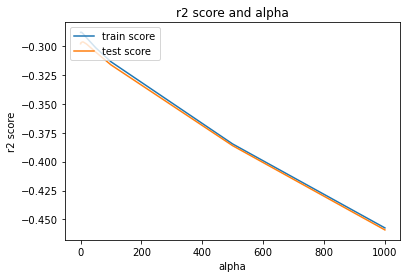

In [290]:
# plotting mean test and train scoes with alpha to tune hyper parameter
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.title("r2 score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [291]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8286314583375527
0.8250597396599174
174.9672810373588
80.54737350571736
0.1713685416624474
0.18347921071917395


## Lasso

In [292]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [293]:
# Printing the best hyperparameter 

print(model_cv.best_params_)

{'alpha': 0.001}


In [294]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=0.001)

In [295]:
lasso.coef_

array([ 0.40397086,  0.33405443,  0.24652168, -0.4023503 , -0.21895693,
        0.33578669,  0.27940113, -0.25652929,  0.29734411,  0.20035332,
        0.13765805, -0.23541528,  0.17797758, -0.34655093,  0.24337051,
        0.29264732, -0.30217014, -0.28380292, -0.31165452])

In [296]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8295531404951269
0.8245739554007074
174.0262435544755
80.77104212318555
0.17044685950487318
0.18398870643094659


In [297]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.830576          0.828631          0.829553
1   R2 Score (Test)           0.824461          0.825060          0.824574
2       RSS (Train)         172.982398        174.967281        174.026244
3        RSS (Test)          80.823039         80.547374         80.771042
4       MSE (Train)           0.411612          0.413967          0.412852
5        MSE (Test)           0.429077          0.428345          0.428939

#### Question 1

###### What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


Existing value of alpha for ridge is {'alpha': 7.0} and for Lasso is Lasso(alpha=0.001)

if we double the alpha for ridge is 14 and for lasso is 0.002

In [303]:
# Ridge

alpha = 14
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 0.4218449   0.33471306  0.23823131 -0.38248909 -0.14923465  0.23193081
  0.20459064 -0.24335936  0.23757521  0.16673668  0.09138682 -0.1011874
  0.13740151 -0.2316309   0.23342775  0.267126   -0.2281507  -0.22490086
 -0.27245768]
0.8262509947895839
0.8245307024040489


In [299]:
# Lasso 

alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 0.41708432  0.33424944  0.2412465  -0.40620018 -0.13423632  0.28415305
  0.23612476 -0.25679621  0.25937092  0.16968531  0.03424831 -0.
  0.1342917  -0.28916172  0.23595956  0.28128563 -0.26621128 -0.25772767
 -0.29424664]
0.8273462939040661
0.8235434500500931


In [304]:
X_train_new.columns

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'MSZoning_RM',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'BsmtExposure_Gd',
       'BsmtQual_NA', 'KitchenQual_Fa', 'GarageType_NA'],
      dtype='object')

###### Question 3

In [305]:
# Lasso 

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 0.40397086  0.33405443  0.24652168 -0.4023503  -0.21895693  0.33578669
  0.27940113 -0.25652929  0.29734411  0.20035332  0.13765805 -0.23541528
  0.17797758 -0.34655093  0.24337051  0.29264732 -0.30217014 -0.28380292
 -0.31165452]
0.8295531404951269
0.8245739554007074


In [306]:
X_train_new.columns

Index(['OverallQual', '1stFlrSF', '2ndFlrSF', 'MSZoning_RM',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'BsmtExposure_Gd',
       'BsmtQual_NA', 'KitchenQual_Fa', 'GarageType_NA'],
      dtype='object')

In [307]:
#OverallQual, 1stFlrSF, MSZoning_RM, MSZoning_RM , Exterior2nd_Stucco

In [308]:
X_train_new = X_train_new.drop(['OverallQual', '1stFlrSF', 'MSZoning_RM', 'MSZoning_RM' , 'Exterior2nd_Stucco'],axis=1)

In [310]:
X_test_new = X_test_new.drop(['OverallQual', '1stFlrSF', 'MSZoning_RM', 'MSZoning_RM' , 'Exterior2nd_Stucco'],axis=1)

In [311]:
# Lasso 

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 0.2856664  -0.90377789  0.41581989  0.5690433  -0.37398965  1.18644364
  0.61186618  1.12285138 -0.18521784  0.6581996   0.53405839  0.86285695
 -0.57336942 -0.56885612 -0.74659245]
0.5417314421098622
0.5206449441707175


In [312]:
X_test_new.columns

Index(['2ndFlrSF', 'Neighborhood_BrDale', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior2nd_VinylSd', 'BsmtExposure_Gd',
       'BsmtQual_NA', 'KitchenQual_Fa', 'GarageType_NA'],
      dtype='object')